# Lista 4 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

Naive Bayes - Discriminante Quadrático Gaussiano
    
## 1)  Classifição utilizando Naive Bayes e DQG
- Carregue os dados contidos no arquivo DadosLista4.mat. O arquivo contém uma matriz de dados e o rotulo associado a cada dado. A matriz de dados (Dados) é composta de 1500 linhas e 2 colunas. A matriz dos rótulos (y) apresenta os rótulos das classes. Nestes dados, existem 3 classes, sendo 500 exemplos de cada classe.

- Divida aleatoriamente o conjunto de dados entre treino e teste. Para este problema, utilize 600 (200 de cada classe) dados para treino, 900 (300 de cada classe) dados para teste.

- Implemente os seguintes classificadores: Naive Bayes e Discriminante Quadrático Gaussiano
    
    - **Apresentar**: As matrizes de confusão para os dois classificadores
    - **Comentários**: Com base nos resultados, comente sobre a hipótese de cada uma das classes ser linearmente separávele.



### Carregando os dados:

In [1]:
import scipy.io as sio
import numpy as np


def load_data():
    mat_contents = sio.loadmat('DadosLista4.mat')
    X = mat_contents['Dados']
    T = mat_contents['y']
    return (X, T)

def filter_by_target(data, label):
    return data[data[:,-1] == label]

def split_train_test(data, split_value):
    train = data[:split_value,:]
    test = data[split_value:,:]
    return train, test

def split_x_t(data):
    return data[:,:-1], data[:,-1]

X, T = load_data()

### Dividindo o conjunto em teste e treinamento:

In [2]:
XT = np.concatenate((X,T), axis=1)

XT1 = filter_by_target(XT, 1)

XT2 = filter_by_target(XT, 2)

XT3 = filter_by_target(XT, 3)

XT1_train, XT1_test = split_train_test(XT1, 200)
XT2_train, XT2_test = split_train_test(XT2, 200)
XT3_train, XT3_test = split_train_test(XT3, 200)

XT_train = np.concatenate((XT1_train, XT2_train, XT3_train))
XT_test = np.concatenate((XT1_test, XT2_test, XT3_test))

X_train, T_train = split_x_t(XT_train)
X_test, T_test = split_x_t(XT_test)

### Rodando o Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

nb_clf = GaussianNB()
nb_clf.fit(X_train, T_train)

predicted_nb = nb_clf.predict(X_test)

### Calculando a matriz de confusão:

In [4]:
print confusion_matrix(T_test, predicted_nb)

[[297   3   0]
 [ 34 266   0]
 [  1   0 299]]


### Rodando o Discriminante Quadrático

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qd_clf = QuadraticDiscriminantAnalysis()
qd_clf.fit(X_train, T_train)

predicted_qd = qd_clf.predict(X_test) 

### Calculando a matriz de confusão:

In [6]:
print confusion_matrix(T_test, predicted_qd)

[[299   1   0]
 [ 36 263   1]
 [  0   0 300]]


### Análise da hipótese de linearidade:

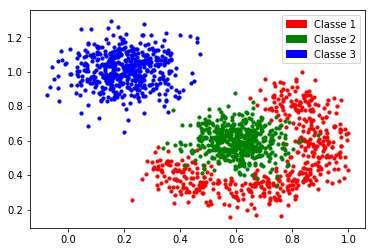

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

X1, T1 = split_x_t(XT1)
X2, T2 = split_x_t(XT2)
X3, T3 = split_x_t(XT3)

plt.scatter(X1[:,0], X1[:,1], s=10, c='r')
plt.scatter(X2[:,0], X2[:,1], s=10, c='g')
plt.scatter(X3[:,0], X3[:,1], s=10, c='b')

leg_1 = mpatches.Patch(color='red', label='Classe 1')
leg_2 = mpatches.Patch(color='green', label='Classe 2')
leg_3 = mpatches.Patch(color='blue', label='Classe 3')

plt.legend(handles=[leg_1, leg_2, leg_3])
plt.show()

### Comentários
Analisando as matrizes de confusão, pudemos perceber que ambos os modelos tiveram mais dificuldade em classificar a classe 2, havendo em média 35 casos que foram classificados erroneamente como percetencentes a classe 1. Por se tratar de modelos que possuem mais facilidade com problemas linearmente separáveis, podemos concluir que tais classes não possuem essa característica. O gráfico dos dados acima corrobora com tal conclusão, pois podemos ver que os elementos da classe 3 são claramente linearmente separáveis dos das classes 1 e 2. Já com relação à separação das classes 1 e 2 o mesmo não se aplica, tornando-se necessário um modelo não-linear.